In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras 
import os.path
import shutil
import random
import glob
import itertools
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow .keras.models import Sequential

In [2]:
# Physical_devices = tf.config.experimental.list_physical_devices("GPU")
# print("Num GPUs Availabel: ", len(Physical_devices))
# tf.config.experimental.set_memory_growth(Physical_devices[0], True)

### Data preparation

In [3]:
os.chdir('dog-vs-cats/train/')

if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    
    for c in random.sample(glob.glob('cat*'), 1000):
        shutil.move(c, 'train/cat' )
    for c in random.sample(glob.glob('dog*'), 1000):
        shutil.move(c, 'train/dog' )
    for c in random.sample(glob.glob('cat*'), 300):
        shutil.move(c, 'valid/cat' )
    for c in random.sample(glob.glob('dog*'), 300):
        shutil.move(c, 'valid/dog' )
    for c in random.sample(glob.glob('cat*'), 150):
        shutil.move(c, 'test/cat' )
    for c in random.sample(glob.glob('cat*'), 150):
        shutil.move(c, 'test/dog' )
        
os.chdir('../../')        

In [4]:
train_path = 'dog-vs-cats/train/train'
valid_path = 'dog-vs-cats/train/valid'
test_path = 'dog-vs-cats/train/test'

In [5]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 800 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [6]:
assert train_batches.n == 800
assert test_batches.n == 200
assert valid_batches.n == 400

In [7]:
imgs, labels = next(train_batches)

In [8]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    for imgs, ax in zip( images_arr, axes):
        ax.imshow(imgs)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

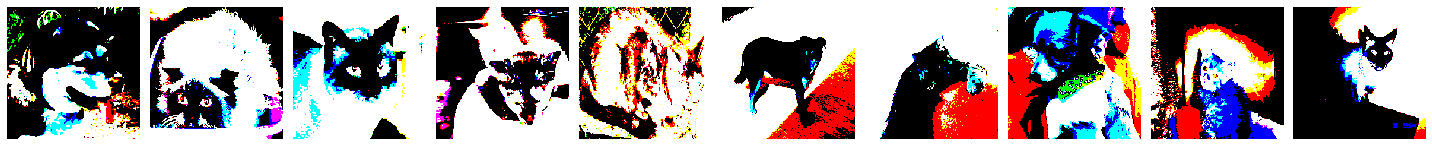

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [9]:
plotImages(imgs)
print(labels)

In [10]:
model = Sequential([
    Conv2D(filters=32, kernel_size =(3,3), activation='relu', padding='same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size =(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax'),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=('accuracy'))

In [13]:
model.fit(x= train_batches, validation_data = valid_batches, epochs=10, verbose=2)

Epoch 1/10
80/80 - 41s - loss: 20.6964 - accuracy: 0.5663 - val_loss: 6.3208 - val_accuracy: 0.5500
Epoch 2/10
80/80 - 56s - loss: 2.3775 - accuracy: 0.7663 - val_loss: 4.2569 - val_accuracy: 0.5975
Epoch 3/10
80/80 - 53s - loss: 1.0947 - accuracy: 0.8425 - val_loss: 3.2006 - val_accuracy: 0.5875
Epoch 4/10
80/80 - 56s - loss: 0.1771 - accuracy: 0.9550 - val_loss: 3.1806 - val_accuracy: 0.5975
Epoch 5/10
80/80 - 48s - loss: 0.0145 - accuracy: 0.9950 - val_loss: 3.5895 - val_accuracy: 0.5900
Epoch 6/10
80/80 - 41s - loss: 0.0031 - accuracy: 1.0000 - val_loss: 3.4322 - val_accuracy: 0.5950
Epoch 7/10
80/80 - 41s - loss: 5.3216e-04 - accuracy: 1.0000 - val_loss: 3.2985 - val_accuracy: 0.6000
Epoch 8/10
80/80 - 42s - loss: 3.9343e-04 - accuracy: 1.0000 - val_loss: 3.3527 - val_accuracy: 0.6000
Epoch 9/10
80/80 - 41s - loss: 3.4093e-04 - accuracy: 1.0000 - val_loss: 3.3709 - val_accuracy: 0.6025
Epoch 10/10
80/80 - 41s - loss: 3.0760e-04 - accuracy: 1.0000 - val_loss: 3.3736 - val_accuracy:

### Predicting 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

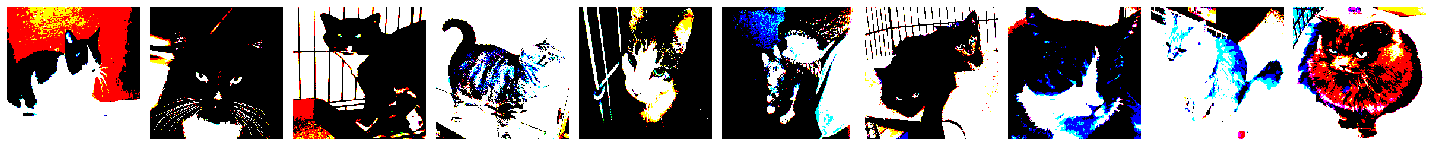

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [14]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [15]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [16]:
predictions =model.predict(x=test_batches, verbose=0)

In [17]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.

In [18]:
cm = confusion_matrix(y_true = test_batches.classes, y_pred =np.argmax(predictions, axis=-1))

In [19]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='confusion  matrix',
                         cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, cm[i, j],
                horizontalalignment='center',
                color='white' if cm[i,j]> thresh else 'black')
        
        plt.tight_layout()
        plt.ylabel('True_label')
        plt.xlabel('Predicted label')

In [20]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[78 22]
 [75 25]]


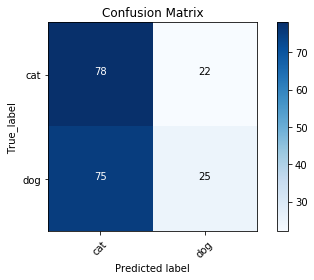

In [21]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

### building Vgg16 model 

In [22]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [23]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [24]:
def count_params(model):
    non_trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.non_trainable_weights])
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    return{'non_trainable_params': non_trainable_params, 'trainable_params':trainable_params}

In [25]:
# params = count_params(vgg16_model)
# assert params['non_trainable_params'] == 0
# assert params['trainable_params'] == 138357544

In [26]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [28]:
params = count_params(model)
assert params['non_trainable_params'] == 0
assert params['trainable_params'] == 134260544

In [29]:
for layer in model.layers:
    layer.trainable = False

In [30]:
model.add(Dense(units=2, activation ='softmax'))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

### Train the fine-tuned VGG16 model

In [32]:
img, labels = next(train_batches)

In [33]:
model.compile(optimizer=Adam(learning_rate =0.0001), loss='categorical_crossentropy', metrics=('accuracy'))

In [34]:
model.fit(x=train_batches, validation_data = valid_batches, epochs = 5, verbose=2)

Epoch 1/5
80/80 - 365s - loss: 0.2732 - accuracy: 0.8875 - val_loss: 0.1315 - val_accuracy: 0.9500
Epoch 2/5
80/80 - 365s - loss: 0.0836 - accuracy: 0.9725 - val_loss: 0.0945 - val_accuracy: 0.9575
Epoch 3/5
80/80 - 366s - loss: 0.0523 - accuracy: 0.9825 - val_loss: 0.0752 - val_accuracy: 0.9675
Epoch 4/5
80/80 - 366s - loss: 0.0393 - accuracy: 0.9837 - val_loss: 0.0704 - val_accuracy: 0.9750
Epoch 5/5
80/80 - 365s - loss: 0.0293 - accuracy: 0.9912 - val_loss: 0.0668 - val_accuracy: 0.9750


In [47]:
assert model.get('accuracy')[-1]>0.95

### Predicting using fine-tuned VGG16 model

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

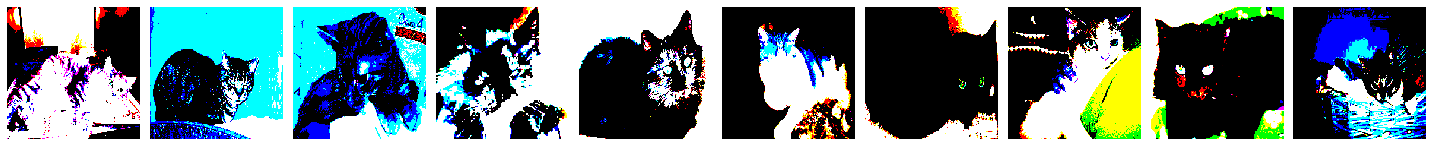

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [36]:
test_imgs, imgs_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [37]:
predictions = model.predict(x=test_batches, verbose=0)

In [38]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

### Confusion metrics for VGG16

In [44]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [45]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[99  1]
 [97  3]]


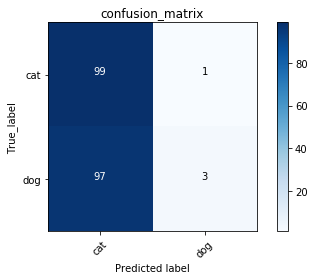

In [46]:
cm_plot_labels=['cat', 'dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='confusion_matrix')

In [48]:
!git init

Initialized empty Git repository in /home/cisco/HandonWork/.git/


In [52]:
!git remote add origin https://github.com/cisco00/VGG16-CV-Cat-vs-Dog.git

In [53]:
!git add .

In [55]:
!git commit -m "First commit on Computer vision"

Auto packing the repository in background for optimum performance.
See "git help gc" for manual housekeeping.
[master (root-commit) 39df7c3] First commit on Computer vision
 26576 files changed, 1881 insertions(+)
 create mode 100644 .ipynb_checkpoints/CNN-checkpoint.ipynb
 create mode 100644 .ipynb_checkpoints/DataManipulation-checkpoint.ipynb
 create mode 100644 .ipynb_checkpoints/LearningKeras-checkpoint.ipynb
 create mode 100644 .ipynb_checkpoints/MNIST-checkpoint.ipynb
 create mode 100644 .ipynb_checkpoints/mobilenet-checkpoint.ipynb
 create mode 100644 .ipynb_checkpoints/requirements-checkpoint.txt
 create mode 100644 CNN.ipynb
 create mode 100644 MNIST.ipynb
 create mode 100644 dog-vs-cats/green.jpeg
 create mode 100644 dog-vs-cats/train/cat.0.jpg
 create mode 100644 dog-vs-cats/train/cat.10.jpg
 create mode 100644 dog-vs-cats/train/cat.100.jpg
 create mode 100644 dog-vs-cats/train/cat.1000.jpg
 create mode 100644 dog-vs-cats/train/cat.10000.jpg
 create mode 100644 dog-vs-cats/t

In [ ]:
!git push origin master

Username for 'https://github.com': 

In [ ]:
08106689260@Ab